## **VISUALIZACIÓN**

#### **THE SIMPSONS - AWARDS & RATINGS**

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

Notebook Color Scheme: 


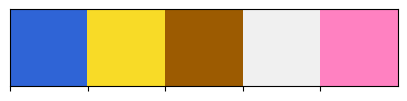

In [254]:
#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#2f64d6", "#f8db27", "#9c5b01", "#f0f0f0", "#ff81c1"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))

In [255]:
df_ratings = pd.read_csv("./final_data/simpsons_ratings.csv")

df_ratings.head(1)

,title,description,air_date,directed_by,written_by,season,episode,us__million_viewers,imdb_rating,tmdb_rating,tmdb_vote_count
0,Simpsons Roasting on an Open Fire,Homer is forced to become a department store S...,1989-12-17,David Silverman,Mimi Pond,1,1,26.7,8.1,6.921,101


In [256]:
df_awards = pd.read_csv("./final_data/simpsons_awards.csv")
df_awards.head(1)

,award_id,organization,year,award_category,award,result,person,role,character,episode_id,season,episode
0,100,"Golden Globes, USA",2003,Golden Globe,Best Television Series - Comedy or Musical,Nominee,NaN,NaN,NaN,NaN,NaN,NaN


#### **PREGUNTAS**

#### 1. CONTEXTO


- **1.1  Año lanzamiento**

In [257]:
primer_ep = df_ratings.loc[(df_ratings['season'] == 1) & (df_ratings['episode'] == 1),
    'air_date'].values[0]

print("Fecha de lanzamiento del primer episodio:", primer_ep)

Fecha de lanzamiento del primer episodio: 1989-12-17


- **1.2  Personajes**

#### 2. EPISODIOS Y RATINGS

- **2.1. Total temporadas y episodios**

In [258]:
total_temporadas = df_ratings['season'].nunique()
total_episodios = df_ratings.shape[0]  #cuenta las filas

print("Total temporadas:", total_temporadas)
print("Total episodios:", total_episodios)


Total temporadas: 34
Total episodios: 747


- **2.2. Top 10 episódios más vistos**

In [259]:
top10_vistos = df_ratings.sort_values(by='us__million_viewers', ascending=False).head(10)
top10_vistos[['title', 'season', 'episode', 'us__million_viewers']]


,title,season,episode,us__million_viewers
13,Bart Gets an 'F',2,1,33.6
8,Life on the Fast Lane,1,9,33.5
10,The Crepes of Wrath,1,11,31.2
11,Krusty Gets Busted,1,12,30.4
9,Homer's Night Out,1,10,30.3
14,Simpson and Delilah,2,2,29.9
68,Lisa's First Word,4,10,28.6
7,The Telltale Head,1,8,28.0
6,The Call of the Simpsons,1,7,27.6
2,Homer's Odyssey,1,3,27.5


- **2.3. Top 10 episódios mejor valorados**

In [260]:
top10_valorados = df_ratings.sort_values(by='imdb_rating', ascending=False).head(10)
top10_valorados[['title', 'season', 'episode', 'imdb_rating']]

,title,season,episode,imdb_rating
175,Homer's Enemy,8,23,9.3
154,You Only Move Twice,8,2,9.2
82,Cape Feare,5,2,9.2
108,Treehouse of Horror V,6,6,9.2
127,Who Shot Mr. Burns? - Part I,6,25,9.2
70,Marge vs. the Monorail,4,12,9.1
128,Who Shot Mr. Burns? - Part II,7,1,9.0
114,Homer the Great,6,12,9.0
178,The City of New York vs. Homer Simpson,9,1,9.0
134,King-Size Homer,7,7,9.0


- **2.4. Top 5 temporadas mejor valoradas y fechas de lanzamiento**

In [261]:
top5_temporadas = df_ratings.groupby('season').agg({'imdb_rating': 'mean', 'air_date': 'first'}).reset_index()
top5_temporadas = top5_temporadas.sort_values(by='imdb_rating', ascending=False).head(5)

top5_temporadas[['season', 'air_date', 'imdb_rating']]

,season,air_date,imdb_rating
6,7,1995-09-17,8.352000
4,5,1993-09-30,8.331818
5,6,1994-09-04,8.328000
3,4,1992-09-24,8.263636
7,8,1996-10-27,8.204000


#### 2. PREMIOS Y NOMINACIONES

- **2.1 Total premios Nominados x Total premios Ganados**

In [262]:
df_awards['result'].value_counts()

result
Nominee    1187
Winner      678
Name: count, dtype: int64

Nominados: 1865, Ganados: 678
% PREMIOS GANADOS: 36.35%


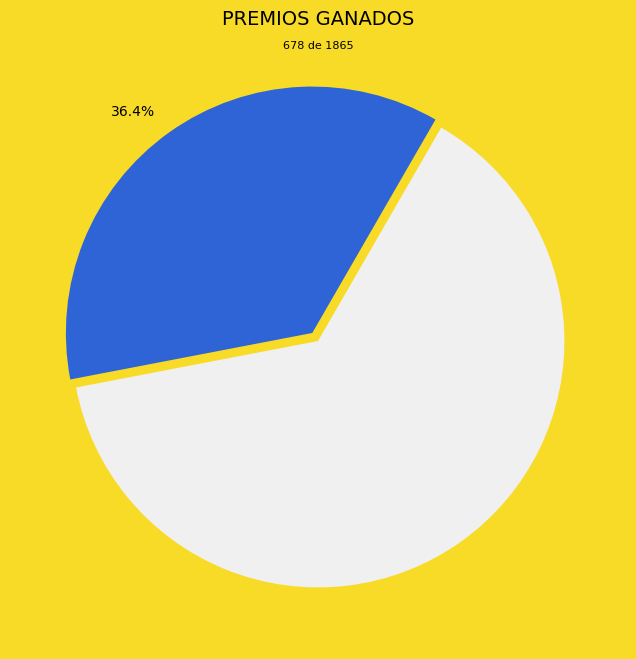

In [263]:
total = df_awards['result'].value_counts()
nominee = total.iloc[0]
winner = total.iloc[1]
suma_total = nominee + winner

p_ganados = winner / suma_total * 100

print(f"Nominados: {suma_total}, Ganados: {winner}")
print(f"% PREMIOS GANADOS: {p_ganados:.2f}%")

# GRÁFICO PIE
sizes = [winner, suma_total - winner]
colors = ["#2f64d6", "#f0f0f0"]
explode = [0.04, 0]

plt.figure(figsize=(8,8), facecolor='#f8db27')
plt.pie(
    sizes,
    colors=colors,
    explode=explode,
    labels=[f'{p_ganados:.1f}%', ''],
    startangle=60,
    shadow=False)

plt.title(f'PREMIOS GANADOS', fontsize=14)
plt.text(0, 1.2, f'{winner} de {suma_total}', ha='center', va='center', fontsize=8)

plt.show()

- **2.2 Top 5 categorias más premiadas**

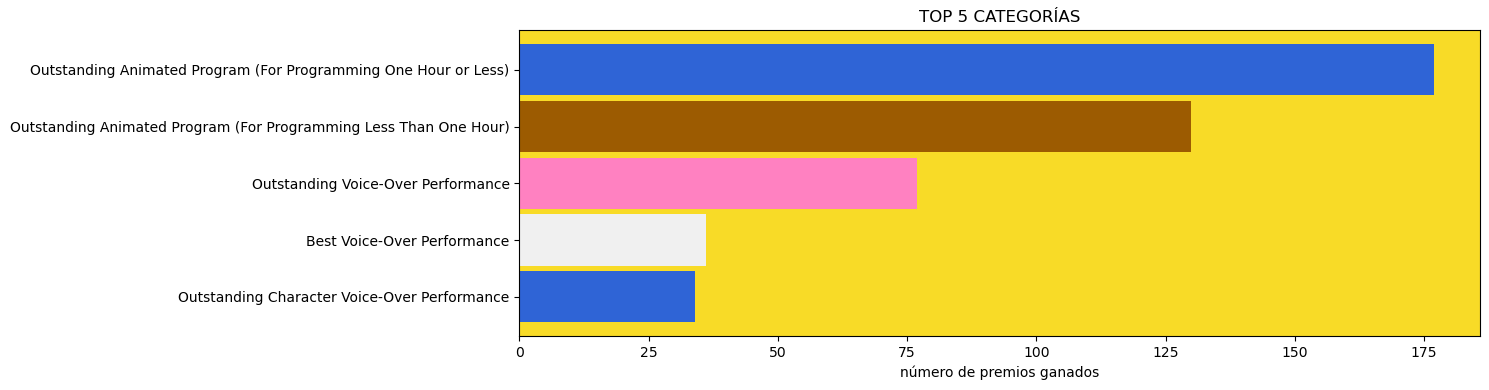

In [264]:
# Top 5 categorías más premiadas (solo ganados)
top_categories = (
    df_awards[df_awards['result'] == 'Winner']
    ['award']
    .value_counts()
    .head(5)
)

# Ordenar de mayor a menor para barh (más grande arriba)
top_categories = top_categories.sort_values(ascending=True)

my_colors = ["#2f64d6", "#f0f0f0", "#ff81c1", "#9c5b01", "#2f64d6"]

plt.figure(figsize=(15,4))
plt.barh(
    top_categories.index,
    top_categories.values,
    height=0.9,
    color=my_colors[:len(top_categories)]
)

plt.gca().set_facecolor('#f8db27')
plt.title('TOP 5 CATEGORÍAS', fontsize=12)
plt.xlabel('número de premios ganados', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show()


- **2.3 Personajes más premiadas**

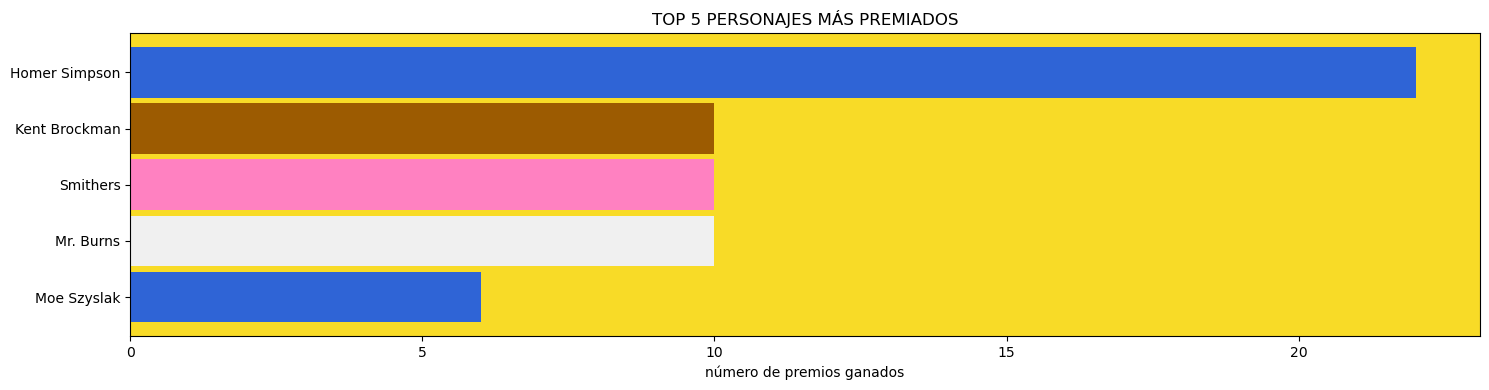

In [265]:
# Top 5 personajes más premiados (solo ganados)
top_characters = (
    df_awards[df_awards['result'] == 'Winner']
    ['character']
    .value_counts()
    .head(5)
)

# Ordenar de mayor a menor para barh (más grande arriba)
top_characters = top_characters.sort_values(ascending=True)

my_colors = ["#2f64d6", "#f0f0f0", "#ff81c1", "#9c5b01", "#2f64d6"]

plt.figure(figsize=(15,4))
plt.barh(
    top_characters.index,
    top_characters.values,
    height=0.9,
    color=my_colors[:len(top_characters)]
)

plt.gca().set_facecolor('#f8db27')
plt.title('TOP 5 PERSONAJES MÁS PREMIADOS', fontsize=12)
plt.xlabel('número de premios ganados', fontsize=10)
plt.ylabel('')
plt.tight_layout()
plt.show()


- **2.4 Evolución premios por año: años con más premios** (línea de tendencia?)

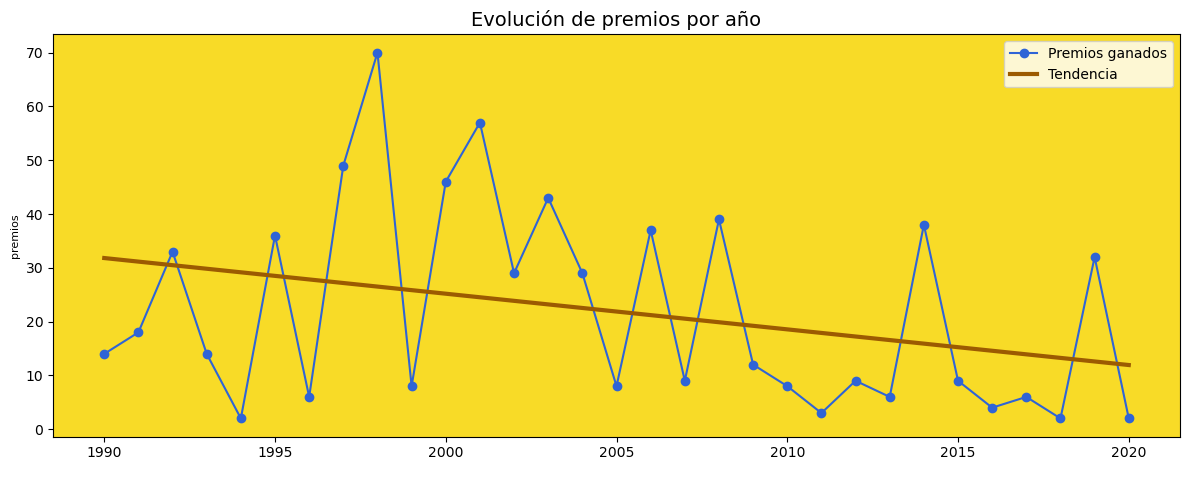

In [266]:
# Contar premios ganados por año
awards_per_year = df_awards[df_awards['result'] == 'Winner']['year'].value_counts().sort_index()

plt.figure(figsize=(12,5))
plt.plot(awards_per_year.index, awards_per_year.values, marker='o', color='#2f64d6', label='Premios ganados')

# Línea de tendencia recta
z = np.polyfit(awards_per_year.index, awards_per_year.values, 1)
p = np.poly1d(z)
plt.plot(awards_per_year.index, p(awards_per_year.index), color='#9c5b01', linewidth=3, label='Tendencia')

# Fondo del gráfico
plt.gca().set_facecolor('#f8db27')

plt.title('Evolución de premios por año', fontsize=14)
plt.xlabel(' ')
plt.ylabel('premios', fontsize=8)
plt.legend()
plt.tight_layout()
plt.show()
